In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Fakenews.csv")

In [9]:
data.dropna(axis=0,inplace=True)
data.reset_index(inplace=True)

In [10]:
data.head(4)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1


In [11]:
data.shape

(18285, 6)

In [12]:
import seaborn as sns

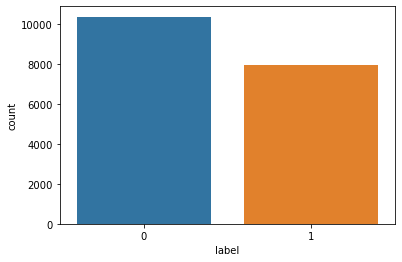

In [13]:
sns.countplot(data["label"])

In [16]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [17]:
corpus=[]
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
from tensorflow import keras

c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [20]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional
from keras.models import Sequential

In [21]:
one_hot=[one_hot(word,5000) for word in corpus]

In [22]:
same_dim_one_hot=pad_sequences(one_hot,maxlen=20,
    dtype='int32',
    padding='pre',)

In [23]:
same_dim_one_hot

array([[   0,    0,    0, ..., 4019, 3338, 1817],
       [   0,    0,    0, ..., 3345, 4016, 2968],
       [   0,    0,    0, ..., 2465,   78, 1557],
       ...,
       [   0,    0,    0, ..., 4465, 2764, 3394],
       [   0,    0,    0, ..., 3888, 3988,  191],
       [   0,    0,    0, ..., 1189, 2208, 3168]])

In [24]:
import numpy as np

In [26]:
y=data["label"]

In [27]:
x=np.array(same_dim_one_hot)
y=np.array(y)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [30]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(5000, embedding_vector_features, input_length=20))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 29s 151ms/step - loss: 0.3039 - accuracy: 0.8520 - val_loss: 0.2021 - val_accuracy: 0.9176
Epoch 2/10
192/192 [==============================] - 28s 147ms/step - loss: 0.1513 - accuracy: 0.9413 - val_loss: 0.1938 - val_accuracy: 0.9198
Epoch 3/10
192/192 [==============================] - 27s 139ms/step - loss: 0.1129 - accuracy: 0.9570 - val_loss: 0.2064 - val_accuracy: 0.9147
Epoch 4/10
192/192 [==============================] - 27s 141ms/step - loss: 0.0944 - accuracy: 0.9664 - val_loss: 0.2512 - val_accuracy: 0.9145
Epoch 5/10
192/192 [==============================] - 27s 143ms/step - loss: 0.0748 - accuracy: 0.9732 - val_loss: 0.2965 - val_accuracy: 0.9105
Epoch 6/10
192/192 [==============================] - 29s 151ms/step - loss: 0.0609 - accuracy: 0.9786 - val_loss: 0.3429 - val_accuracy: 0.9118
Epoch 7/10
192/192 [==============================] - 30s 156ms/step - loss: 0.0479 - accuracy: 0.9840 - val_loss: 0.3529 - val_ac

In [33]:
pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [35]:
cm=confusion_matrix(y_test,pred)
print(cm)

[[3109  310]
 [ 250 2366]]


In [36]:
accuracy_score(y_test,pred)

0.9072079536039768